In [2]:
install.packages("matlib")
install.packages("rsample")
install.packages("corrplot")
install.packages("zoo")
install.packages("patchwork")
install.packages("e1071")
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘cowplot’, ‘Deriv’, ‘forecast’, ‘microbenchmark’, ‘rbibutils’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘Rdpack’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘rgl’, ‘car’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘warp’, ‘furrr’, ‘slider’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is uns

In [3]:
library(matlib)
library(ggplot2)
library(rsample)
library(corrplot)
library(tidyr)
library(dplyr)
library(zoo)
library(patchwork)
library(e1071)
library("GGally")
library(corrplot)

corrplot 0.95 loaded


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘e1071’


The following object is masked from ‘package:rsample’:

    permutations


The following object is masked from ‘package:ggplot2’:

    element




In [4]:
# data <- read.csv('https://drive.google.com/file/d/1tPCqloxA8sp93cS2GhluT9ecAZjqAymX/view?usp=sharing')
data=as.matrix(read.csv(file="https://drive.google.com/uc?export=download&id=1tPCqloxA8sp93cS2GhluT9ecAZjqAymX", header = FALSE));
colnames(data) = data[1, ];
data = data[-1,];
data

x1,x3,x4,x5,x2
8.34,40.77,1010.84,90.01,480.48
23.64,58.49,1011.4,74.2,445.75
29.74,56.9,1007.15,41.91,438.76
19.07,49.69,1007.22,76.79,453.09
11.8,40.66,1017.13,97.2,464.43
13.97,39.16,1016.05,84.6,470.96
22.1,71.29,1008.2,75.38,442.35
14.47,41.76,1021.98,78.41,464
31.25,69.51,1010.25,36.83,428.77
6.77,38.18,1017.8,81.13,484.31


In [5]:
X = data[, c("x1","x2","x3","x4")];
X

x1,x2,x3,x4
8.34,480.48,40.77,1010.84
23.64,445.75,58.49,1011.4
29.74,438.76,56.9,1007.15
19.07,453.09,49.69,1007.22
11.8,464.43,40.66,1017.13
13.97,470.96,39.16,1016.05
22.1,442.35,71.29,1008.2
14.47,464,41.76,1021.98
31.25,428.77,69.51,1010.25
6.77,484.31,38.18,1017.8


In [6]:
Y = data[, c("x5")];
Y

[1] "90.01"  "74.2"   "41.91"  "76.79"  "97.2"   "84.6"   "75.38"  "78.41" 
   [9] "36.83"  "81.13"  "69.9"   "49.42"  "61.23"  "80.33"  "58.75"  "60.34" 
  [17] "47.1"   "86.04"  "68.51"  "38.05"  "77.33"  "49.37"  "70.99"  "89.19" 
  [25] "75.44"  "77.23"  "72.46"  "91.92"  "64.37"  "49.03"  "95.79"  "83.63" 
  [33] "81.53"  "45.4"   "47.51"  "58.34"  "93.09"  "62.65"  "78.42"  "59.56" 
  [41] "63.38"  "84.49"  "33.71"  "46.93"  "87.68"  "65.25"  "85.61"  "67.32" 
  [49] "75.38"  "68.54"  "88.36"  "32.97"  "63.24"  "86.33"  "56.54"  "89.92" 
  [57] "87.78"  "73.18"  "97.46"  "74.01"  "78.7"   "43.4"   "73.37"  "57.01" 
  [65] "41.55"  "71.91"  "92.74"  "66.95"  "89.78"  "73.27"  "60.32"  "56.09" 
  [73] "94.92"  "76.63"  "84.41"  "44.45"  "65.41"  "67.15"  "58.46"  "73.19" 
  [81] "100.09" "68.13"  "39.95"  "77.81"  "67.51"  "77.74"  "88.82"  "63.71" 
  [89] "72.77"  "65.49"  "66.31"  "65.87"  "41.43"  "49.27"  "69.97"  "61.19" 
  [97] "99.19"  "96.88"  "45.87"  "88.44"  "81.13"  "56.13"  "78.32"  "75.44" 
 [105] "86.8"   "85.23"  "67.84"  "92.52"  "62.03"  "77.1"   "62.57"  "85.78" 
 [113] "74.16"  "73.6"   "74.99"  "52.85"  "86.52"  "71.48"  "84.53"  "74.69" 
 [121] "87.33"  "73.08"  "93.7"   "63.54"  "90.32"  "38.19"  "68.1"   "86.8"  
 [129] "81.68"  "68.03"  "65.49"  "79.43"  "70.68"  "90.91"  "85.56"  "84.49" 
 [137] "83.01"  "98.55"  "81.46"  "68.21"  "82.12"  "82.92"  "54.83"  "83.14" 
 [145] "67.9"   "79.06"  "66.64"  "70.07"  "98.08"  "89.96"  "69.22"  "48.15" 
 [153] "62.69"  "95.6"   "99.67"  "85.36"  "70.55"  "63.53"  "83.15"  "71.24" 
 [161] "83.17"  "54.1"   "59.93"  "57.07"  "66.21"  "60.88"  "79.41"  "100.13"
 [169] "91.7"   "66.93"  "61.88"  "47.74"  "89.19"  "61.66"  "91.55"  "68.29" 
 [177] "98.56"  "67.03"  "64.32"  "51.23"  "69.86"  "66.62"  "55.6"   "80.82" 
 [185] "93.59"  "86.49"  "86.3"   "86.13"  "81.68"  "81.38"  "80.4"   "71.57" 
 [193] "73.28"  "75.18"  "74.17"  "73.53"  "89.76"  "83.18"  "58.38"  "76.74" 
 [201] "52.83"  "69.29"  "60.34"  "62.94"  "72.77"  "80.37"  "87.36"  "73.26" 
 [209] "86.98"  "85.35"  "65.2"   "36.48"  "75.35"  "44.43"  "52.75"  "90.11" 
 [217] "59.29"  "80.37"  "88.7"   "44.28"  "86.2"   "62.25"  "83.37"  "67.03" 
 [225] "76.31"  "79.7"   "72"     "75.36"  "47.58"  "75.77"  "68.29"  "43.88" 
 [233] "35.9"   "44.6"   "88.11"  "68.44"  "63.42"  "75.68"  "78.72"  "84.29" 
 [241] "68.87"  "80.05"  "51.16"  "82.95"  "58.63"  "87.17"  "70.75"  "89.17" 
 [249] "67.56"  "74.94"  "72.81"  "50.68"  "69.78"  "68.87"  "56.24"  "87.41" 
 [257] "74.24"  "91.84"  "66.6"   "81.5"   "74.77"  "68.82"  "59.71"  "60.91" 
 [265] "90.23"  "73.73"  "83.58"  "46.86"  "69.13"  "65.88"  "78.21"  "70.68" 
 [273] "72.14"  "42.62"  "49.92"  "76.3"   "62.84"  "64.98"  "49.1"   "66.92" 
 [281] "58.52"  "87.12"  "87.55"  "73.96"  "88.49"  "95.91"  "81.17"  "53.09" 
 [289] "72.42"  "61.87"  "82.95"  "76.43"  "57.34"  "56.99"  "77.84"  "81.79" 
 [297] "50.56"  "75.25"  "81.74"  "89.4"   "99.91"  "78.77"  "51.58"  "58.71" 
 [305] "75.97"  "56.8"   "63.39"  "90.64"  "86.97"  "50.9"   "80.81"  "61.49" 
 [313] "73.68"  "89.23"  "64.43"  "84.47"  "79.73"  "89.53"  "73.29"  "62.35" 
 [321] "70.68"  "66.73"  "50.16"  "60.46"  "49.9"   "93.03"  "100.15" "83.02" 
 [329] "46.11"  "91.25"  "63.67"  "64.85"  "57.71"  "72.02"  "84.49"  "69"    
 [337] "84.66"  "98.06"  "46.38"  "79.02"  "50.39"  "37.9"   "53.29"  "53.32" 
 [345] "77.84"  "83.45"  "81.66"  "74.51"  "58.88"  "87.68"  "67"     "84.07" 
 [353] "66.65"  "87.43"  "94.67"  "85.81"  "66.74"  "65.53"  "95.71"  "92.77" 
 [361] "55.53"  "76.39"  "59.42"  "80.09"  "87.09"  "79.77"  "94.48"  "46.86" 
 [369] "59.42"  "77.53"  "89.12"  "74.74"  "76.73"  "85.71"  "55.17"  "61.97" 
 [377] "91.49"  "75.24"  "91.21"  "73.22"  "76.98"  "75.88"  "51.71"  "70.88" 
 [385] "62.53"  "42.75"  "58.01"  "56.61"  "93.83"  "99.12"  "70.54"  "56.23" 
 [393] "67.58"  "90.57"  "63.46"  "70.22"  "95.53"  "67.7"   "87.83"  "81.21" 
 [401] "77.56"  "91.96"  "74.75"  "97.41"  "73.42"  "

In [7]:
values = 1:length(data);
index = matrix(values, nrow = length(data), ncol = 1);
index

1
2
3
4
5
6
7
8
9
10
11


**Time Series plot using index**

In [8]:
X.ts<-ts(X,start = 1, frequency =1)
Y.ts<-ts(Y,start = 1, frequency =1)

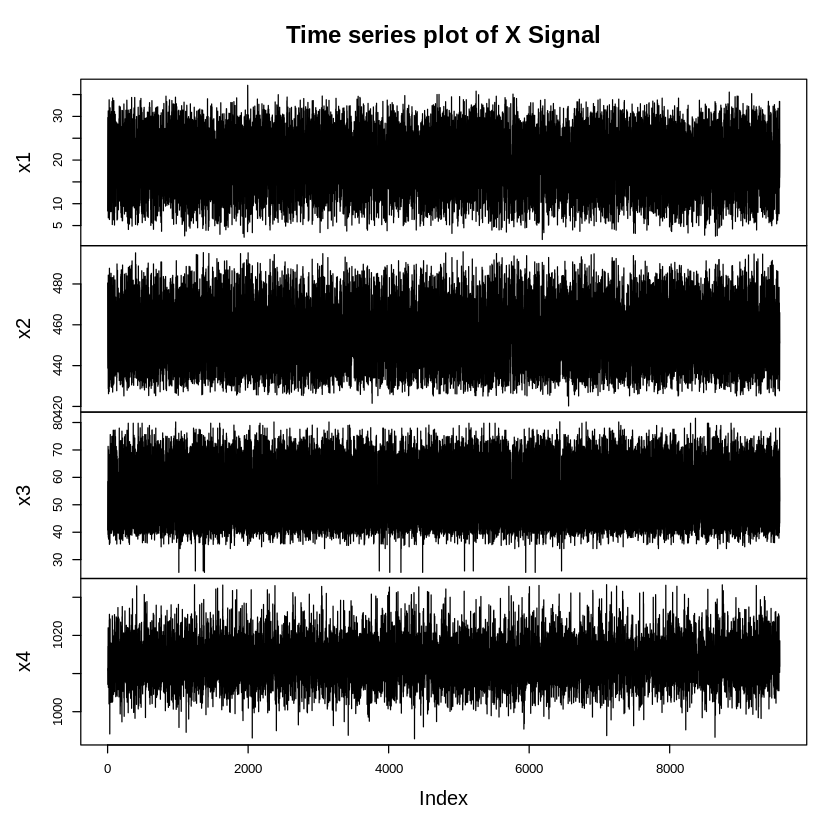

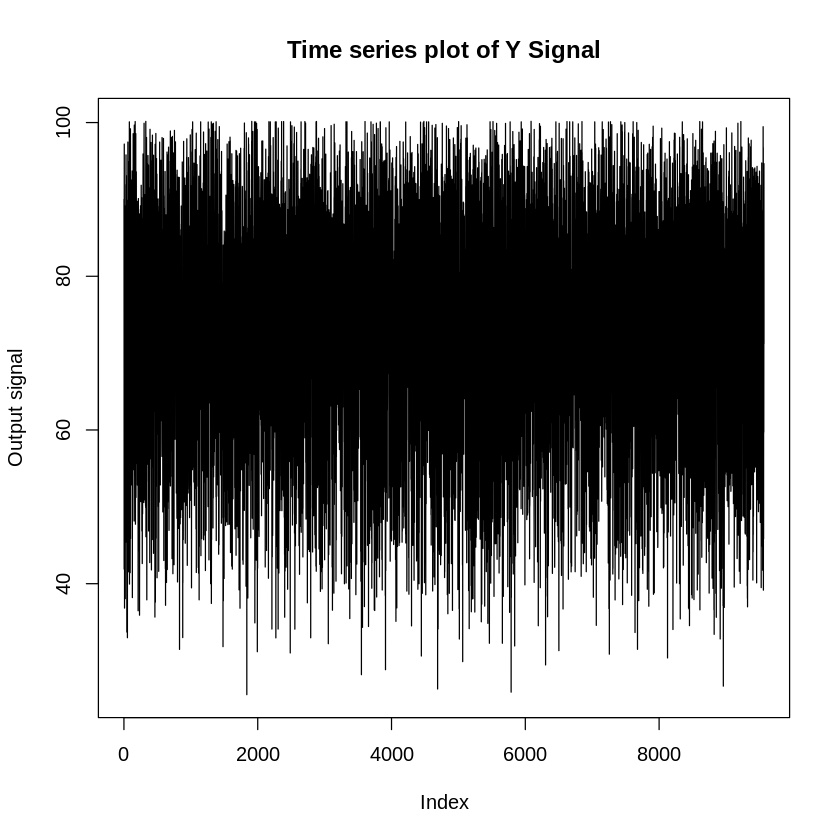

In [9]:
plot(X.ts,main = "Time series plot of X Signal", xlab = "Index", ylab = "Input signal")
plot(Y.ts,main = "Time series plot of Y Signal", xlab = "Index", ylab = "Output signal")

In [10]:
# Converting matrix into dataframe an
df <- data.frame(index = index, data[, c("x1","x2","x3","x4", "x5")])
df[] <- lapply(df, function(col) {
  if (is.character(col)) as.numeric(col) else col
})
df

index,x1,x2,x3,x4,x5
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,8.34,480.48,40.77,1010.84,90.01
2,23.64,445.75,58.49,1011.40,74.20
3,29.74,438.76,56.90,1007.15,41.91
4,19.07,453.09,49.69,1007.22,76.79
5,11.80,464.43,40.66,1017.13,97.20
6,13.97,470.96,39.16,1016.05,84.60
7,22.10,442.35,71.29,1008.20,75.38
8,14.47,464.00,41.76,1021.98,78.41
9,31.25,428.77,69.51,1010.25,36.83


**Another way to visualize the given inputs signals**

In [11]:
#calculate 100 days rolling average for all columns
window_size <- 100

numeric_cols <- names(df)[sapply(df, is.numeric) & names(df) != "index"]

df_smoothed <- df %>%
  mutate(across(all_of(numeric_cols),
                ~ rollmean(.x, k = window_size, fill = NA, align = "center"),
                .names = "{.col}_smooth"))

In [12]:
# Plot function
create_smoothed_plot <- function(data, raw_var, smooth_var, color, title, y_label) {

  ggplot(data, aes(x = index)) +
    geom_line(aes(y = .data[[raw_var]]), color = color, alpha = 0.2, linewidth = 0.5) +
    geom_line(aes(y = .data[[smooth_var]]), color = color, linewidth = 1.5) +
    labs(title = title, y = y_label, x = NULL) +
    theme_minimal(base_size = 14) +
    theme(
      plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
      panel.grid.minor = element_blank(),
      axis.text = element_text(size = 13),
      axis.title = element_text(size = 14),
      plot.margin = margin(t = 5, r = 10, b = 5, l = 10)
    )
}


# Generate plots for x1-x4
p1 <- create_smoothed_plot(df_smoothed, "x1", "x1_smooth", "#1f77b4",
                           "Ambient Temperature (x1)", "Temperature (°C)")

p2 <- create_smoothed_plot(df_smoothed, "x2", "x2_smooth", "#9467bd",
                           "Energy Output (x2)", "Energy (MW)")

p3 <- create_smoothed_plot(df_smoothed, "x3", "x3_smooth", "#ff7f0e",
                           "Ambient Pressure (x3)", "Pressure (millibar)")

p4 <- create_smoothed_plot(df_smoothed, "x4", "x4_smooth", "#d62728",
                           "Exhaust Vacuum (x4)", "Vacuum (cm Hg)")
p4 <- p4 + labs(x = "Time (index)")


Warning message:
“Removed 99 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 99 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 99 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 99 rows containing missing values or values outside the scale range
(`geom_line()`).”


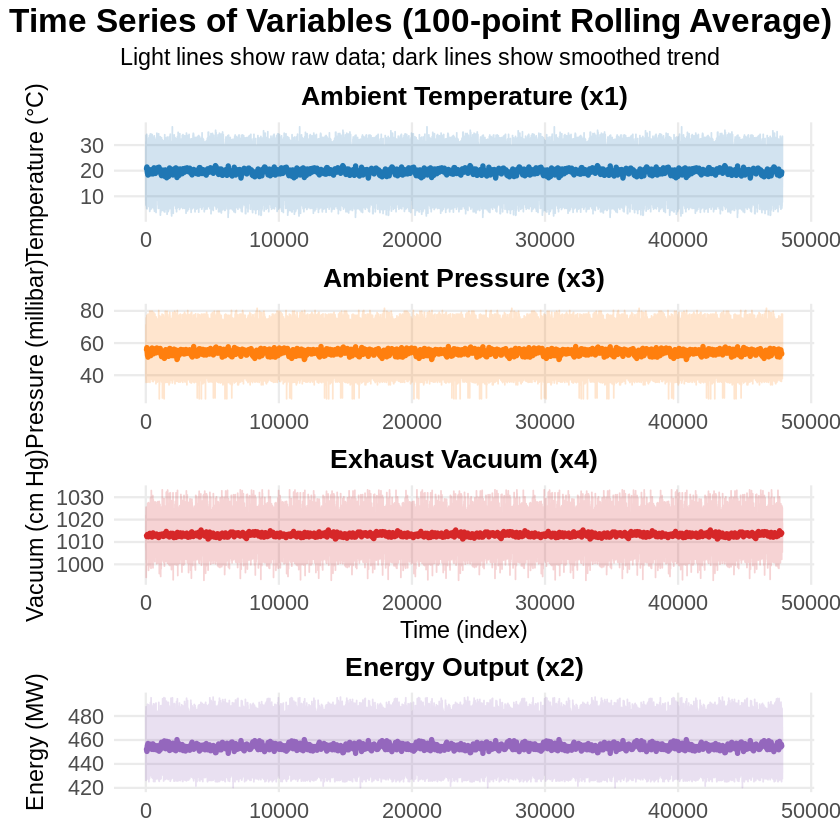

In [13]:
combined_plot <- p1 / p3 / p4 / p2 +
  plot_annotation(
    title = "Time Series of Variables (100-point Rolling Average)",
    subtitle = "Light lines show raw data; dark lines show smoothed trend",
    theme = theme(
      plot.title = element_text(size = 20, hjust = 0.5, face = "bold"),
      plot.subtitle = element_text(size = 14, hjust = 0.5)
    )
  )

combined_plot

**task 1.2 : Plotting distribution of each input variable**

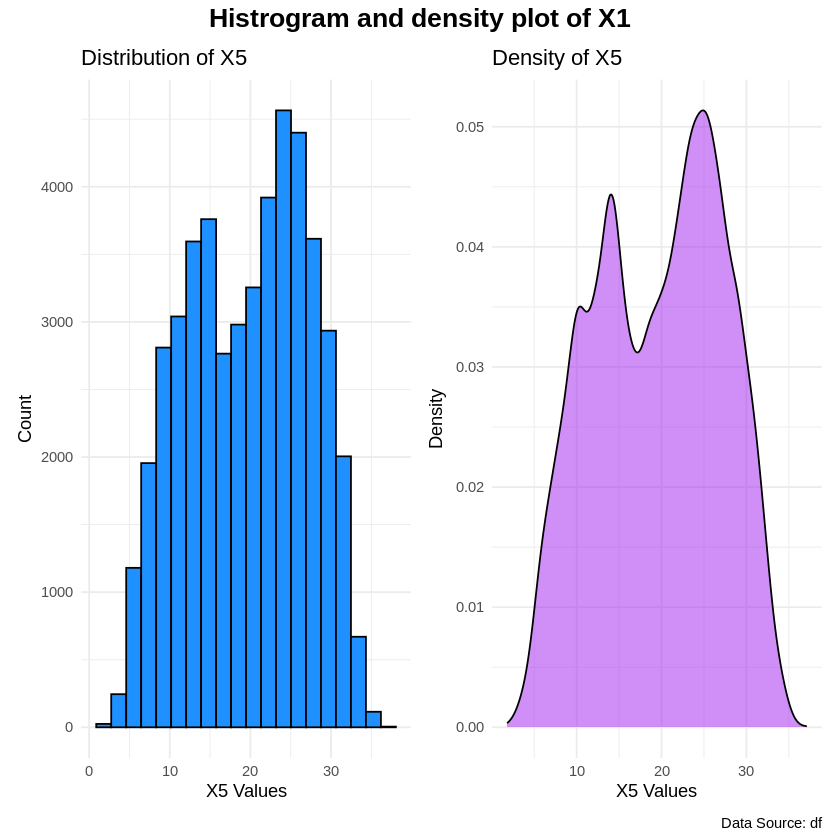

In [14]:
p_h1 = ggplot(df, aes(x = x1)) +
  geom_histogram(bins = 20, fill = "dodgerblue", color = "black") +
  labs(title = "Distribution of X5", x = "X5 Values", y = "Count") +
  theme_minimal()

p_d1 = ggplot(df, aes(x = x1)) +
  geom_density(fill = "purple", alpha = 0.5) +
  labs(title = "Density of X5", x = "X5 Values", y = "Density") +
  theme_minimal()

# Example with unified title
combined_plot <- (p_h1 | p_d1) +
  plot_annotation(
    title = 'Histrogram and density plot of X1',
    caption = 'Data Source: df',
    theme = theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"))
  )

  print(combined_plot)

In [20]:
get_mode <- function(x) {
  # Count the frequency of each unique value
  freq <- table(x)

  # Find the value(s) with the maximum frequency
  mode_val <- names(freq[freq == max(freq)])

  # Convert to original type (numeric if possible)
  if (is.numeric(x)) {
    mode_val <- as.numeric(mode_val)
  }

  return(mode_val)
}

In [21]:
combined_hist_den = function(df, col_name) {
  # 1. Setup Data and Pre-calculate Statistics
  col_sym <- sym(col_name)
  data <- df[[col_name]]
  data <- data[!is.na(data)] # Clean NA for calcs

  mean_val <- mean(data)
  med_val  <- median(data)
  mode_val <- get_mode(data)
  skew_val <- skewness(data)

  # 2. Dynamic Positioning for Annotations
  dens <- density(data)
  max_y <- max(dens$y)

  # Ensure visibility by extending y-axis (e.g., 15% headroom)
  y_limit <- max_y * 1.15
  y_label_pos <- max_y * 1.10

  # Calculate x position based on 5% of the total range (robust)
  x_range <- max(data) - min(data)
  x_label_pos <- min(data) + (x_range * 0.05)

  # Create stats label
  stats_label <- paste0(
    "Mean = ", round(mean_val, 2), "\n",
    "Median = ", round(med_val, 2), "\n",
    "Mode = ", mode_val, "\n",
    "Skewness = ", round(skew_val, 2)
  )

  # 3. Build the Plot
  p_combined <- ggplot(df, aes(x = !!col_sym)) +
    geom_histogram(
      aes(y = after_stat(density)),
      bins = 20,
      fill = "dodgerblue",
      color = "black",
      alpha = 0.7
    ) +
    geom_density(color = "blue", linewidth = 1) +

    # Vertical Lines (Aesthetics mapped for automatic legend)
    geom_vline(aes(xintercept = mean_val, color = "Mean"),
               linetype = "dashed", linewidth = 1) +
    geom_vline(aes(xintercept = med_val, color = "Median"),
               linetype = "dashed", linewidth = 1) +
    geom_vline(aes(xintercept = mode_val, color = "Mode"),
               linetype = "dashed", linewidth = 1) +

    # Text Annotation (using calculated, visible position)
    annotate(
      "text",
      x = x_label_pos,
      y = y_label_pos,
      label = stats_label,
      hjust = 0,
      vjust = 1,
      size = 4,
      fontface = "bold",
      color = "#333333"
    ) +
    labs(
      title = paste("Histogram and Density Plot of", col_name),
      x = col_name,
      y = "Density"
    ) +

    # Enforce new y-limit to contain the text annotation
    coord_cartesian(ylim = c(0, y_limit)) +

    guides(color = "none") +

    theme_minimal(base_size = 14) +
    theme(
      plot.title = element_text(hjust = 0.5, face = "bold"),
      panel.grid.minor = element_blank(),
    )

  options(repr.plot.height = 6, repr.plot.width = 12)
  print(p_combined)
}

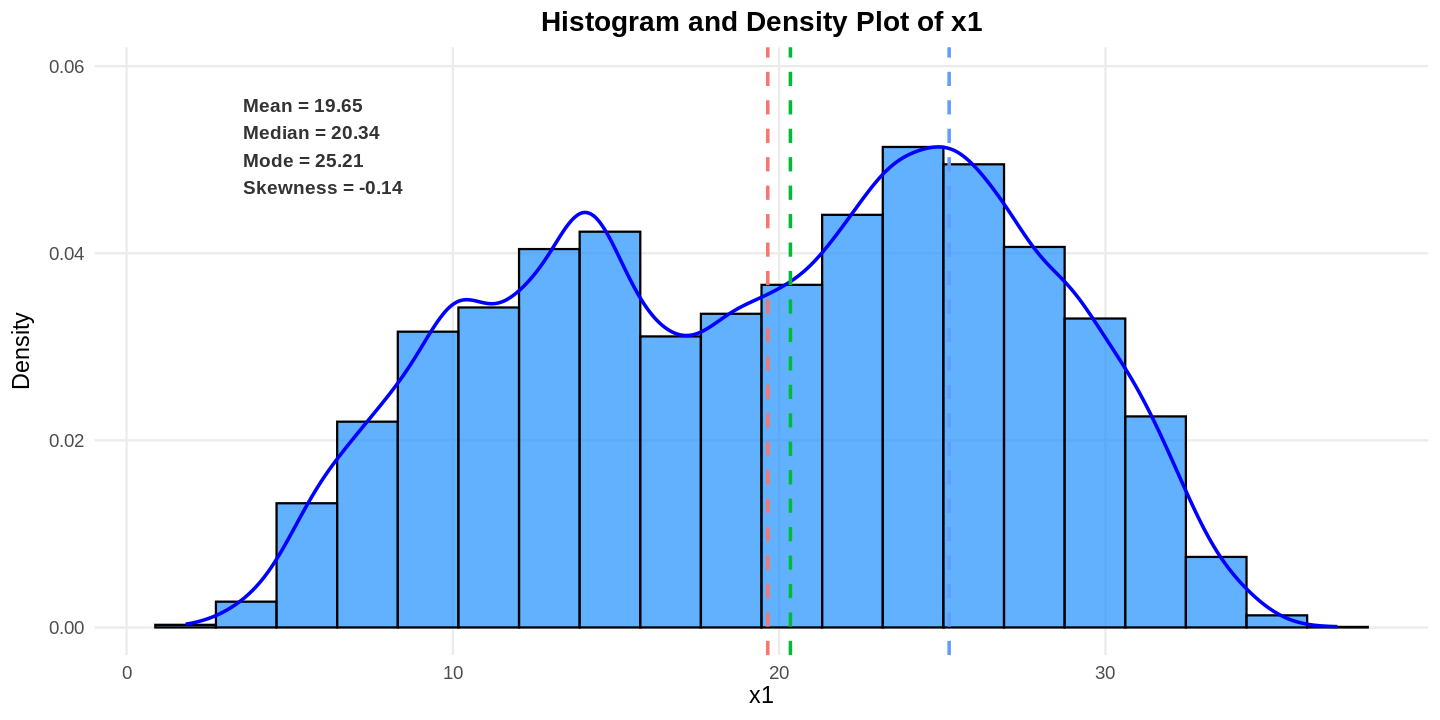

ERROR: [1m[33mError[39m in `geom_vline()`:[22m
[1m[22m[33m![39m Problem while computing aesthetics.
[36mℹ[39m Error occurred in the 5th layer.
[1mCaused by error in `check_aesthetics()`:[22m
[1m[22m[33m![39m Aesthetics must be either length 1 or the same as the data (47840).
[31m✖[39m Fix the following mappings: `xintercept`.


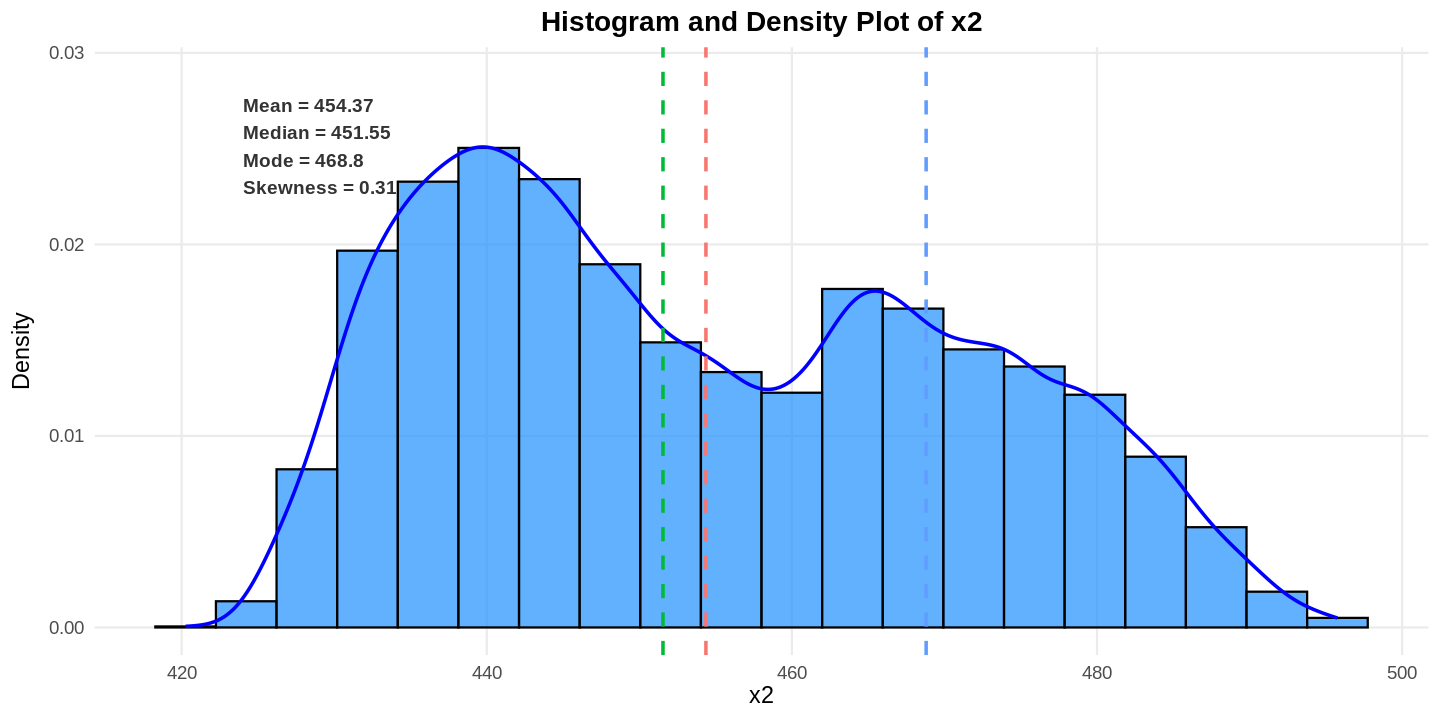

In [22]:
combined_hist_den(df, "x1");
combined_hist_den(df, "x2");
combined_hist_den(df, "x3");
combined_hist_den(df, "x4");

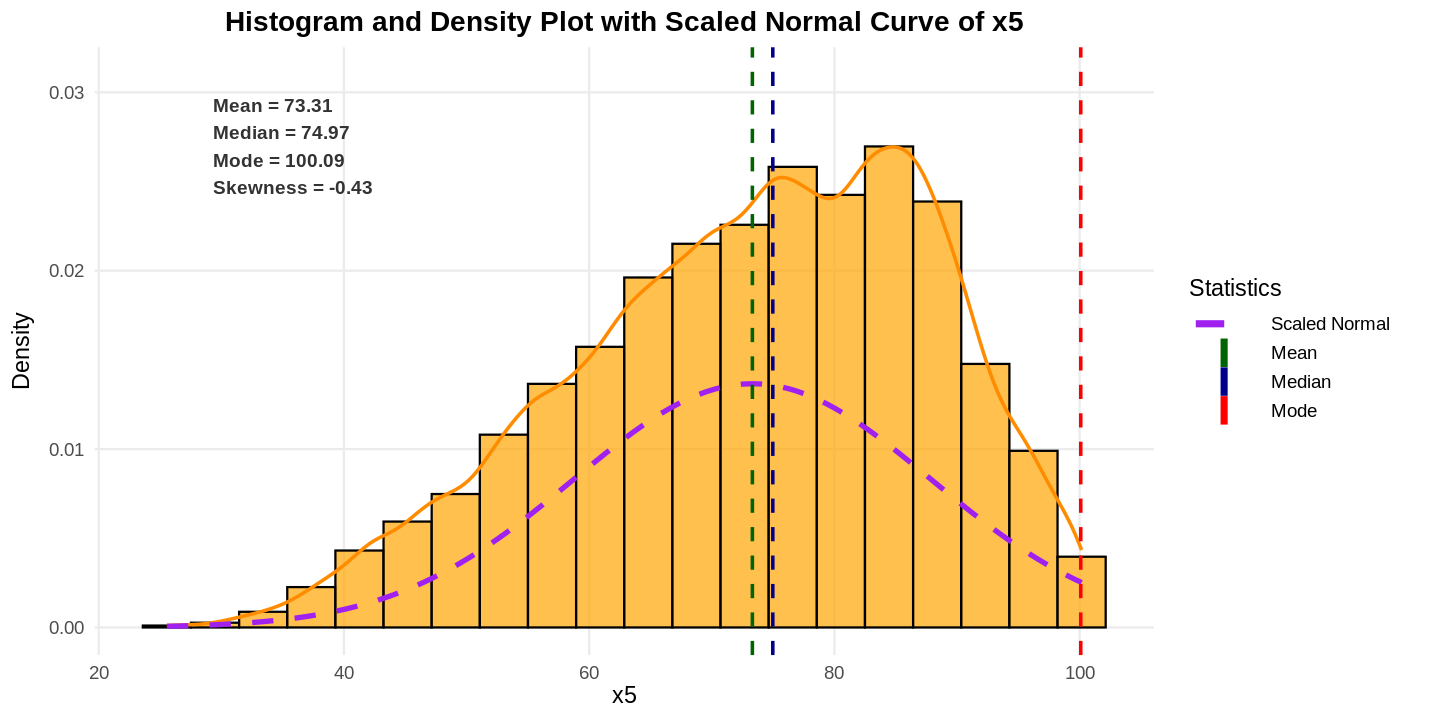

In [23]:
# 1. Setup Data
col_name = "x5"
col_sym <- sym(col_name)
data <- df[[col_name]]
data <- data[!is.na(data)]

# 2. Calculate Stats and Define Scaling Factor 📏
norm_scale_factor <- 0.5 # <--- NEW: Set a scaling factor (e.g., 50% of original height)

mean_val <- mean(data)
med_val  <- median(data)
mode_val <- get_mode(data)
skew_val <- skewness(data)
sd_val   <- sd(data)

# 3. Dynamic Positioning Calculations
dens <- density(data)
max_y <- max(dens$y)

# Recalculate the peak of the *scaled* normal curve
normal_peak_scaled <- dnorm(mean_val, mean = mean_val, sd = sd_val) * norm_scale_factor
max_y_final <- max(max_y, normal_peak_scaled)

y_limit <- max_y_final * 1.15
y_label_pos <- max_y_final * 1.10
x_range <- max(data) - min(data)
x_label_pos <- min(data) + (x_range * 0.05)

# 4. Create Stats Label Text
stats_label <- paste0(
  "Mean = ", round(mean_val, 2), "\n",
  "Median = ", round(med_val, 2), "\n",
  "Mode = ", round(mode_val, 2), "\n",
  "Skewness = ", round(skew_val, 2)
)

# 5. Plotting
p_combined <- ggplot(df, aes(x = !!col_sym)) +
  # Histogram & Empirical Density
  geom_histogram(aes(y = after_stat(density)), bins = 20, fill = "orange", color = "black", alpha = 0.7) +
  geom_density(color = "darkorange", linewidth = 1) +

  # --- MODIFIED: Scaled Normal Distribution Curve ---
  stat_function(
    fun = function(x) dnorm(x, mean = mean_val, sd = sd_val) * norm_scale_factor, # <--- Scaling applied here
    aes(color = "Scaled Normal"),
    linewidth = 1.5,
    linetype = "dashed"
  ) +
  # --------------------------------------------------

  # Vertical Lines (indicators)
  geom_vline(aes(xintercept = mean_val, color = "Mean"),
             linetype = "dashed", linewidth = 1) +
  geom_vline(aes(xintercept = med_val, color = "Median"),
             linetype = "dashed", linewidth = 1) +
  geom_vline(aes(xintercept = mode_val, color = "Mode"),
             linetype = "dashed", linewidth = 1) +

  # Text Annotation
  annotate("text", x = x_label_pos, y = y_label_pos, label = stats_label,
           hjust = 0, vjust = 1, size = 4, fontface = "bold", color = "#333333") +

  # Manual Color Scale for the Legend (Updated label for the scaled curve)
  scale_color_manual(name = "Statistics",
                     values = c("Mean" = "darkgreen",
                                "Median" = "darkblue",
                                "Mode" = "red",
                                "Scaled Normal" = "purple"), # <--- Updated label
                     breaks = c("Scaled Normal", "Mean", "Median", "Mode")) +

  # Guides
  guides(color = guide_legend(override.aes = list(linewidth = c(2, 2, 2, 2)))) +

  labs(title = paste("Histogram and Density Plot with Scaled Normal Curve of", col_name),
       x = col_name, y = "Density") +

  coord_cartesian(ylim = c(0, y_limit)) +

  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    panel.grid.minor = element_blank(),
    legend.position = "right",
    legend.key.width = unit(1.5, "cm")
  )

options(repr.plot.height = 6, repr.plot.width = 12)
print(p_combined)

**Task 1.3: Normality of Data**

In [24]:
make_qq_plot <- function(data, column_name, actual_col_name) {
  # 1. Quoting the column name:
  # The '{{ }}' (embracing) operator from the 'rlang' package (used by ggplot2)
  # allows you to pass a column name as an argument to ggplot.

  p <- ggplot(data, aes(sample = {{ column_name }})) +

    # 2. Add the points (QQ-plot)
    stat_qq(color = "#4C72B0", size = 2.5, alpha = 0.8) +

    # 3. Add the reference line (QQ-line)
    stat_qq_line(color = "red", linetype = "dashed", linewidth = 1) +

    # 4. Customize the theme and labels
    labs(
      title = paste(actual_col_name),
      x = "Theoretical Quantiles (Standard Normal)",
      y = paste("Sample Quantiles")
    ) +

    # Use a clean, professional theme
    theme_minimal() +

    # Further customization of the plot elements
    theme(
      plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
      plot.subtitle = element_text(hjust = 0.5, size = 12, color = "gray50"),
      axis.title = element_text(size = 12),
      axis.text = element_text(size = 10),
      panel.grid.minor = element_blank(),
      panel.border = element_rect(color = "black", fill = NA, linewidth = 0.5)
    )

  return(p)
}

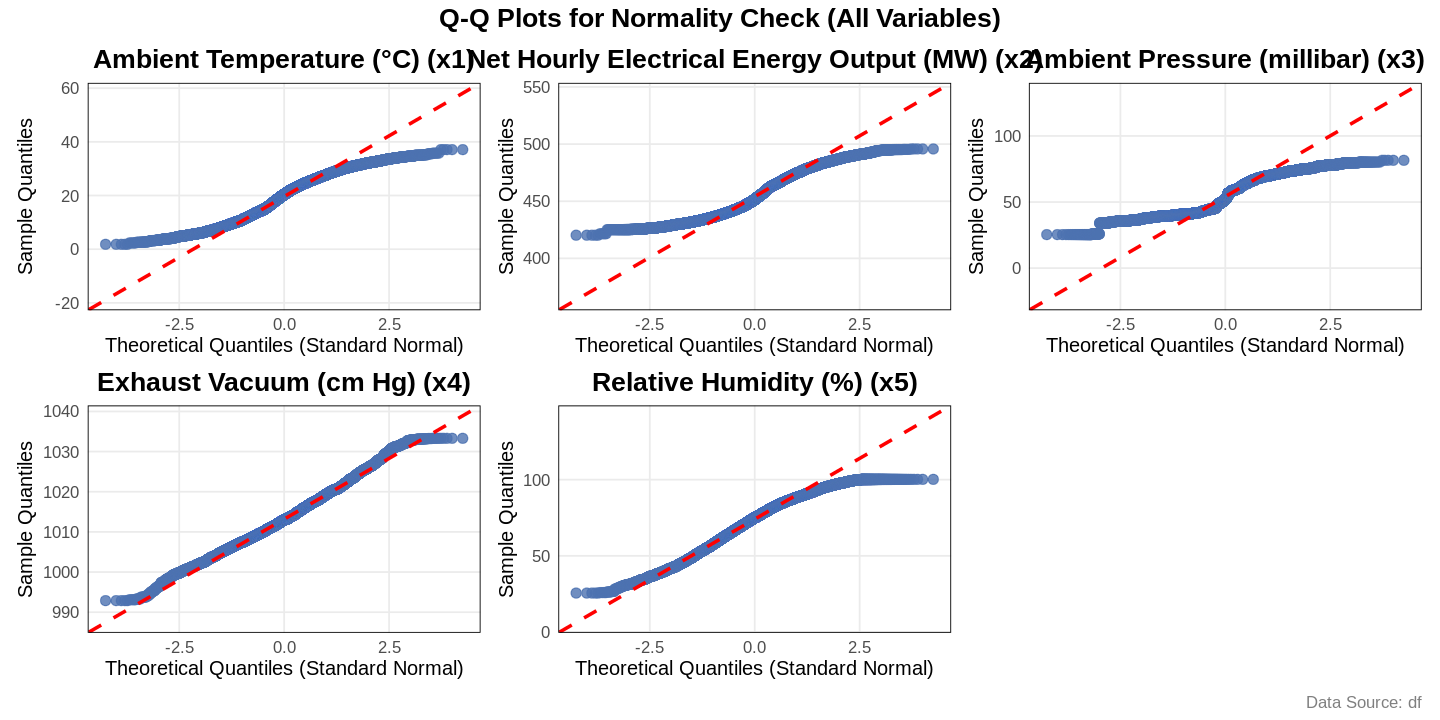

In [25]:
qqp_x1 <- make_qq_plot(df, x1, "Ambient Temperature (°C) (x1)")
qqp_x2 <- make_qq_plot(df, x2, "Net Hourly Electrical Energy Output (MW) (x2)")
qqp_x3 <- make_qq_plot(df, x3, "Ambient Pressure (millibar) (x3)")
qqp_x4 <- make_qq_plot(df, x4, "Exhaust Vacuum (cm Hg) (x4)")
qqp_x5 <- make_qq_plot(df, x5, "Relative Humidity (%) (x5)")


combined_plot <- (qqp_x1 + qqp_x2 + qqp_x3 + qqp_x4 + qqp_x5) +

  # Change: Use plot_layout with ncol = 3 to create a 3-column grid.
  # This results in two rows (3 plots in the first row, 2 in the second).
  plot_layout(ncol = 3) +

  # --- Add a Spanning Title and Theme ---

  plot_annotation(
    title = 'Q-Q Plots for Normality Check (All Variables)', # Matching the example title
    caption = 'Data Source: df',
    theme = theme(
      plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
      plot.caption = element_text(size = 10, color = "gray50")
    )
  )

print(combined_plot)

**Task 1.4: Outliers Detecting:**

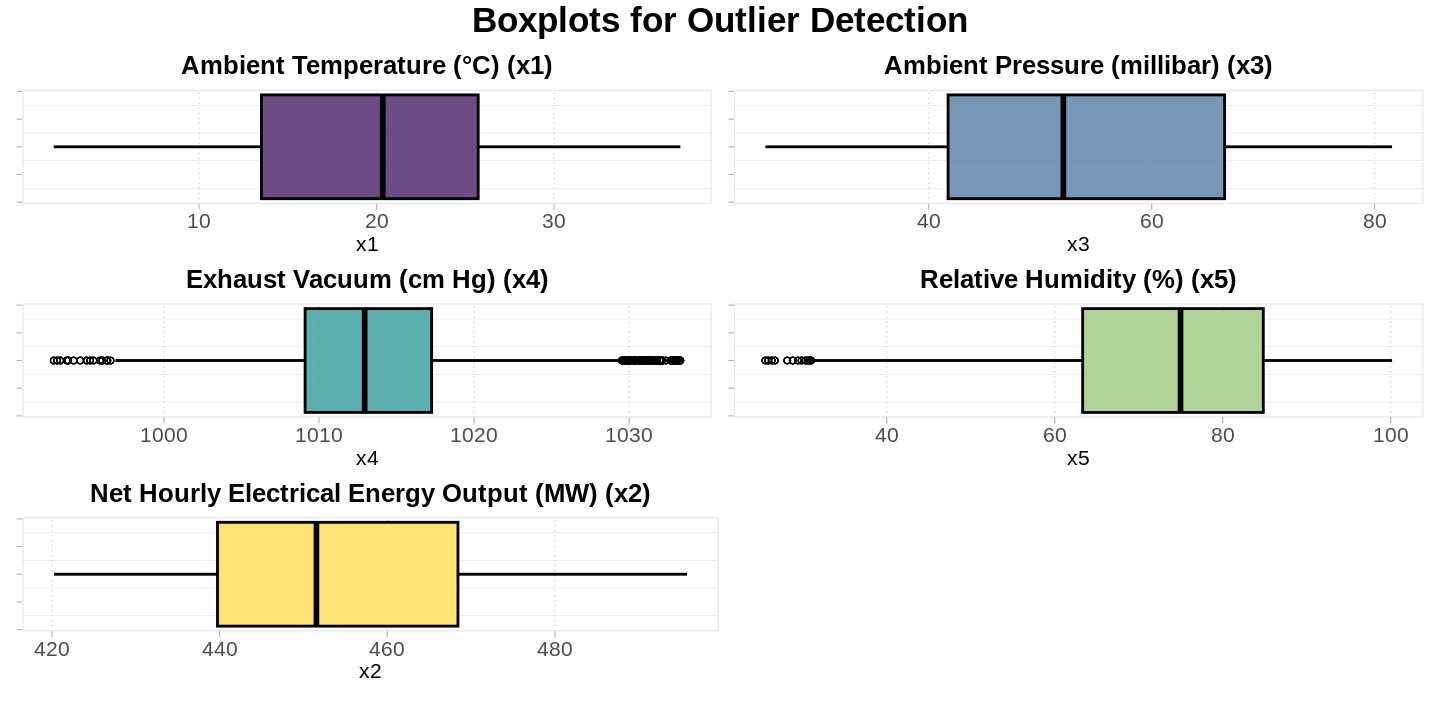

In [26]:
BOX_FILL_COLOR <- "#4C72B0" # A modern, professional medium blue
BOX_LINE_COLOR <- "#345580" # Darker blue for box borders
BASE_SIZE <- 14 # Base text size for better readability

# 2. Custom Theme for a Clean Look (using theme_light)
COLORS <- list(
  x1 = list(fill = "#5D3877", line = "black"), # Dark Purple
  x2 = list(fill = "#FFE066", line = "black"), # Yellow
  x3 = list(fill = "#6A8BAD", line = "black"), # Slate Blue
  x4 = list(fill = "#4DA6A6", line = "black"), # Teal
  x5 = list(fill = "#A8D08D", line = "black")  # Light Green
)

# 2. Custom Theme adjusted for Horizontal Grid Plots
custom_theme <- theme_light(base_size = BASE_SIZE) +
  theme(
    # Titles and Axis
    plot.title = element_text(hjust = 0.5, face = "bold", size = BASE_SIZE * 1.1),
    axis.title.x = element_text(size = BASE_SIZE * 0.9),
    axis.text.x = element_text(size = BASE_SIZE * 0.9),
    axis.title.y = element_blank(),
    axis.text.y = element_blank(),

    # Grid Lines (light vertical lines only, as seen in the image)
    panel.grid.major.x = element_line(linetype = "dotted", color = "gray80"),
    panel.grid.minor.x = element_blank(),
    panel.grid.major.y = element_blank(),

    # Background and Border (Mimic white/light grey background)
    panel.background = element_rect(fill = "white", color = NA),
    plot.background = element_rect(fill = "white", color = NA),
    panel.border = element_rect(colour = "gray90"),

    # Essential for tight grid layout: minimize spacing between subplots
    panel.spacing = unit(0, "lines")
  )

# 3. Helper Function for Consistent Horizontal Boxplots (with dynamic colors)
create_boxplot_horizontal <- function(data, x_var, title, x_label, fill_color, line_color) {
  ggplot(data, aes(x = !!rlang::sym(x_var), y = 0)) +
    geom_boxplot(
      fill = fill_color,
      color = line_color,
      alpha = 0.9,
      linewidth = 0.8,
      outlier.colour = "black",
      outlier.size = 1.5,
      outlier.shape = 1 # Use default circle/dot for visible outliers
    ) +
    labs(title = title, x = x_label, y = NULL) +
    custom_theme
}

# --- 4. Plot Generation (with specific labels and colors) ---

# Top Left
p1 <- create_boxplot_horizontal(df, "x1",
                               "Ambient Temperature (°C) (x1)",
                               "x1", COLORS$x1$fill, COLORS$x1$line)
# Bottom Middle (will be centered)
p2 <- create_boxplot_horizontal(df, "x2",
                               "Net Hourly Electrical Energy Output (MW) (x2)",
                               "x2", COLORS$x2$fill, COLORS$x2$line)
# Top Right
p3 <- create_boxplot_horizontal(df, "x3",
                               "Ambient Pressure (millibar) (x3)",
                               "x3", COLORS$x3$fill, COLORS$x3$line)
# Middle Left
p4 <- create_boxplot_horizontal(df, "x4",
                               "Exhaust Vacuum (cm Hg) (x4)",
                               "x4", COLORS$x4$fill, COLORS$x4$line)
# Middle Right
p5 <- create_boxplot_horizontal(df, "x5",
                               "Relative Humidity (%) (x5)",
                               "x5", COLORS$x5$fill, COLORS$x5$line)


# --- 5. Combining Plots using the (p1 | p3) / (p4 | p5) / (p2) layout ---

combined_plot <- (
    (p1 | p3) / # Top Row: x1 and x3 side-by-side
    (p4 | p5) / # Middle Row: x4 and x5 side-by-side
    (p2 + plot_layout(ncol = 2)) # Bottom Row: x2 centered/spanned across 2 columns
  ) +
  plot_annotation(
    # Overall Title matching the image
    title = 'Boxplots for Outlier Detection',
    caption = '', # The original image had no caption outside the plots
    theme = theme(
      # Ensure main title is centered and prominent
      plot.title = element_text(hjust = 0.5, size = BASE_SIZE * 1.5, face = "bold")
    )
  ) & theme(plot.margin = unit(c(5, 5, 5, 5), "pt")) # Adjust margins for the final crop

print(combined_plot)

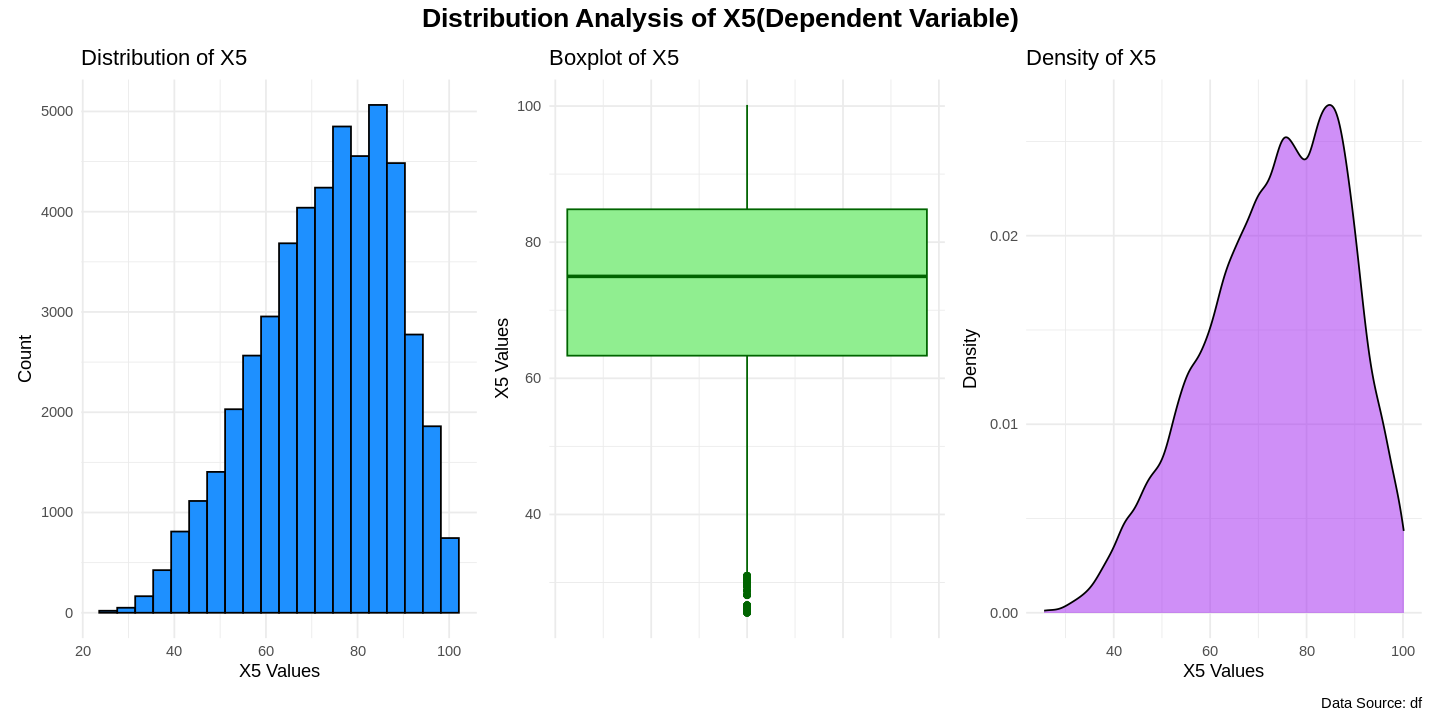

In [27]:
# 1. Histogram of X1
p1 <- ggplot(df, aes(x = x5)) +
  geom_histogram(bins = 20, fill = "dodgerblue", color = "black") +
  labs(title = "Distribution of X5", x = "X5 Values", y = "Count") +
  theme_minimal()

# 2. Boxplot of X2
p2 <- ggplot(df, aes(y = x5)) +
  geom_boxplot(fill = "lightgreen", color = "darkgreen") +
  labs(title = "Boxplot of X5", y = "X5 Values") +
  theme_minimal() +
  # Remove the x-axis label and ticks since it's a single boxplot
  theme(axis.title.x = element_blank(), axis.text.x = element_blank())

# 3. Density Plot of X3
p3 <- ggplot(df, aes(x = x5)) +
  geom_density(fill = "purple", alpha = 0.5) +
  labs(title = "Density of X5", x = "X5 Values", y = "Density") +
  theme_minimal()

# Example with unified title
combined_plot <- (p1 | p2 | p3) +
  plot_annotation(
    title = 'Distribution Analysis of X5(Dependent Variable)',
    caption = 'Data Source: df',
    theme = theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"))
  )

print(combined_plot)

In [28]:
# now calculating and displaying outlier of each variable
# Using IQR method

COLUMNS_TO_ANALYZE <- c("x1", "x3", "x4", "x5")

# --------------------------------------------------

# 2. Outlier Detection Function (Based on your final code)
print_outlier_summary <- function(data, columns) {

  # Print the main header
  cat("Summary of Outliers by Variable:\n")
  cat(paste(rep("-", 50), collapse = ""), "\n")

  for (col in columns) {
    # Get the outlier analysis results
    results <- detect_outliers_iqr(data, col)

    # Calculate key metrics
    outlier_count <- length(results$outliers)
    total_count <- nrow(data)
    percent_of_data <- (outlier_count / total_count) * 100

    # Extract bounds and format them
    lower_bound <- sprintf("%.4f", results$lower_bound)
    upper_bound <- sprintf("%.4f", results$upper_bound)

    # Print results for the current column
    cat("\nOutliers in ", col, ":\n", sep = "")
    cat("Number of outliers: ", outlier_count, " (",
        sprintf("%.2f", percent_of_data), "% of data)\n", sep = "")

    # --- NEW LINE ADDED TO PRINT RANGE ---
    cat("Outlier Range: Below ", lower_bound, " or Above ", upper_bound, "\n", sep = "")
    # -------------------------------------

    # Print separator
    cat(paste(rep("-", 50), collapse = ""), "\n")
  }
}

# --------------------------------------------------

# 4. EXECUTE THE FUNCTION

print_outlier_summary(data = df, columns = COLUMNS_TO_ANALYZE)


Summary of Outliers by Variable:
-------------------------------------------------- 


ERROR: Error in detect_outliers_iqr(data, col): could not find function "detect_outliers_iqr"


**Task 1. 5: Scatter Plots and Scatter Plot Matrix:**

In [ ]:
options(warn = -1)
options(repr.plot.width = 14, repr.plot.height = 12)

library(GGally)
library(ggplot2)
library(scales)
library(rlang)

# ---------------------------------------------------------
# Global theme
# ---------------------------------------------------------
custom_theme <- theme_minimal(base_size = 11) +
  theme(
    axis.text = element_text(size = 8),
    axis.title = element_text(size = 10, face = "bold"),
    strip.text = element_text(size = 10, face = "bold"),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_line(color = "gray95"),
    panel.border = element_rect(fill = NA, color = "gray85", linewidth = 0.4),
    strip.background = element_rect(fill = "gray95", color = "gray85")
  )

theme_set(custom_theme)

# ---------------------------------------------------------
# Select vars + nice labels
# ---------------------------------------------------------
plot_vars <- c("x1", "x3", "x4", "x5", "x2")
plot_data <- df[, plot_vars]

var_labels <- c(
  "Ambient\nTemperature (°C)",
  "Ambient\nPressure (mb)",
  "Exhaust\nVacuum (cmHg)",
  "Relative\nHumidity (%)",
  "Energy\nOutput (MW)"
)

names(plot_data) <- var_labels

# ---------------------------------------------------------
# FIXED UPPER PANEL
# ---------------------------------------------------------
upper_cor <- function(data, mapping, ...) {

  # FIXED NAME EXTRACTION
  x_var <- rlang::as_label(mapping$x)
  y_var <- rlang::as_label(mapping$y)

  x <- data[[x_var]]
  y <- data[[y_var]]

  r <- cor(x, y, use = "complete")
  p <- cor.test(x, y)$p.value

  stars <- ifelse(p < 0.001, "***",
           ifelse(p < 0.01, "**",
           ifelse(p < 0.05, "*", "")))

  label <- paste0("r = ", round(r, 2), stars)
  fill_color <- ifelse(r > 0, "#77AADD", "#EE6677")

  ggplot() +
    annotate("rect", xmin = 0, xmax = 1, ymin = 0, ymax = 1,
             fill = alpha(fill_color, abs(r) * 0.4 + 0.1)) +
    annotate("text",
             x = 0.5, y = 0.5,
             label = label,
             size = 6 + abs(r) * 2,
             fontface = "bold") +
    theme_void()
}

# ---------------------------------------------------------
# LOWER PANEL
# ---------------------------------------------------------
lower_plot <- function(data, mapping, ...) {
  ggplot(data, mapping) +
    geom_point(alpha = 0.25, size = 0.8, color = "#4477AA") +
    geom_smooth(method = "loess", se = FALSE,
                color = "#EE6677", linewidth = 0.9) +
    theme_minimal()
}

# ---------------------------------------------------------
# DIAGONAL PANEL
# ---------------------------------------------------------
diag_density <- function(data, mapping, ...) {
  ggplot(data, mapping) +
    geom_density(fill = "#4477AA", alpha = 0.65, color = "#334466") +
    theme_minimal()
}

# ---------------------------------------------------------
# BUILD FIXED ggpairs
# ---------------------------------------------------------
splom <- ggpairs(
  plot_data,
  upper = list(continuous = upper_cor),
  lower = list(continuous = lower_plot),
  diag  = list(continuous = diag_density)
) +
  ggtitle("Scatter Plot Matrix of CCPP Variables") +
  theme(
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5)
  )

print(splom)

options(warn = 0)


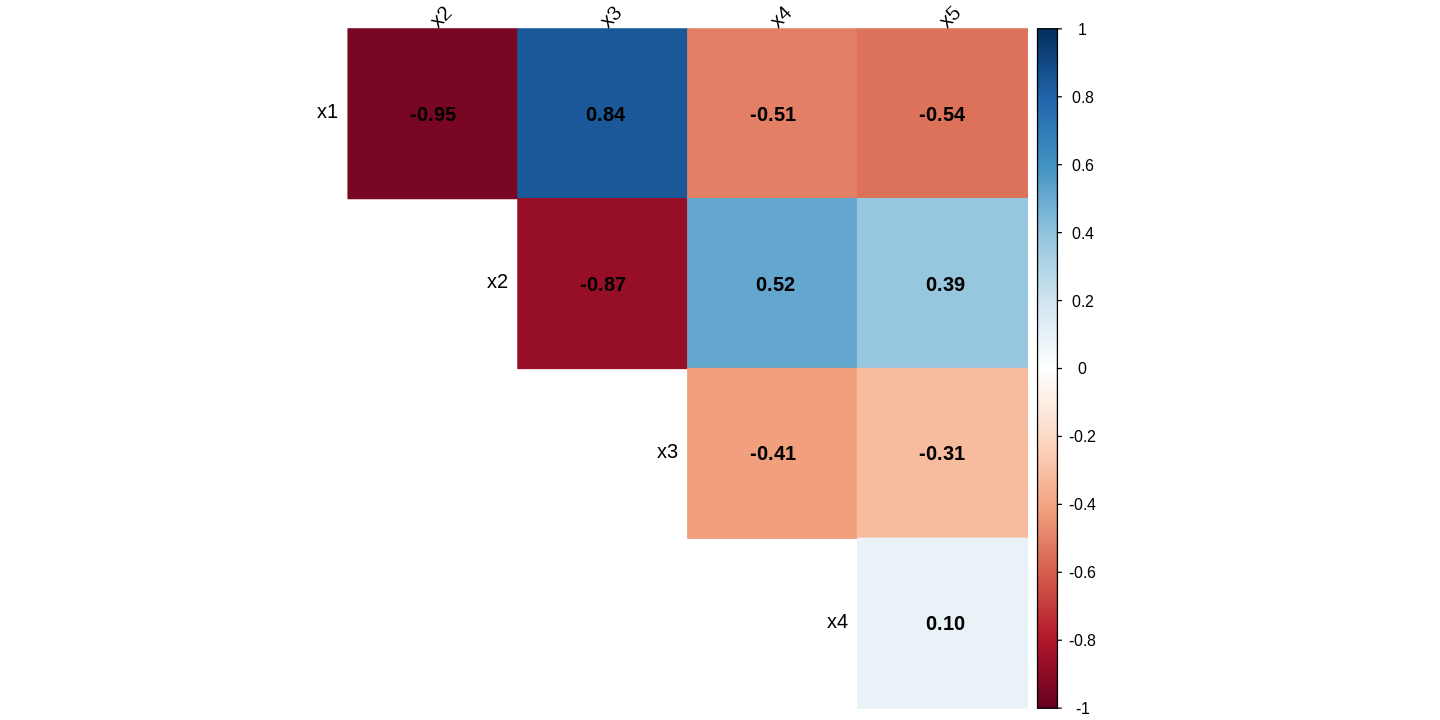

In [29]:
cor_matrix <- cor(df[c('x1', 'x2', 'x3', 'x4', 'x5')])
corrplot(cor_matrix,
         method = "color", # Visualize with color squares
         type = "upper",   # Show only the upper triangle (since it's symmetric)
         addCoef.col = "black", # Add the correlation value text on top
         tl.col = "black",  # Color of the variable labels
         tl.srt = 45,       # Rotate the labels
         diag = FALSE)

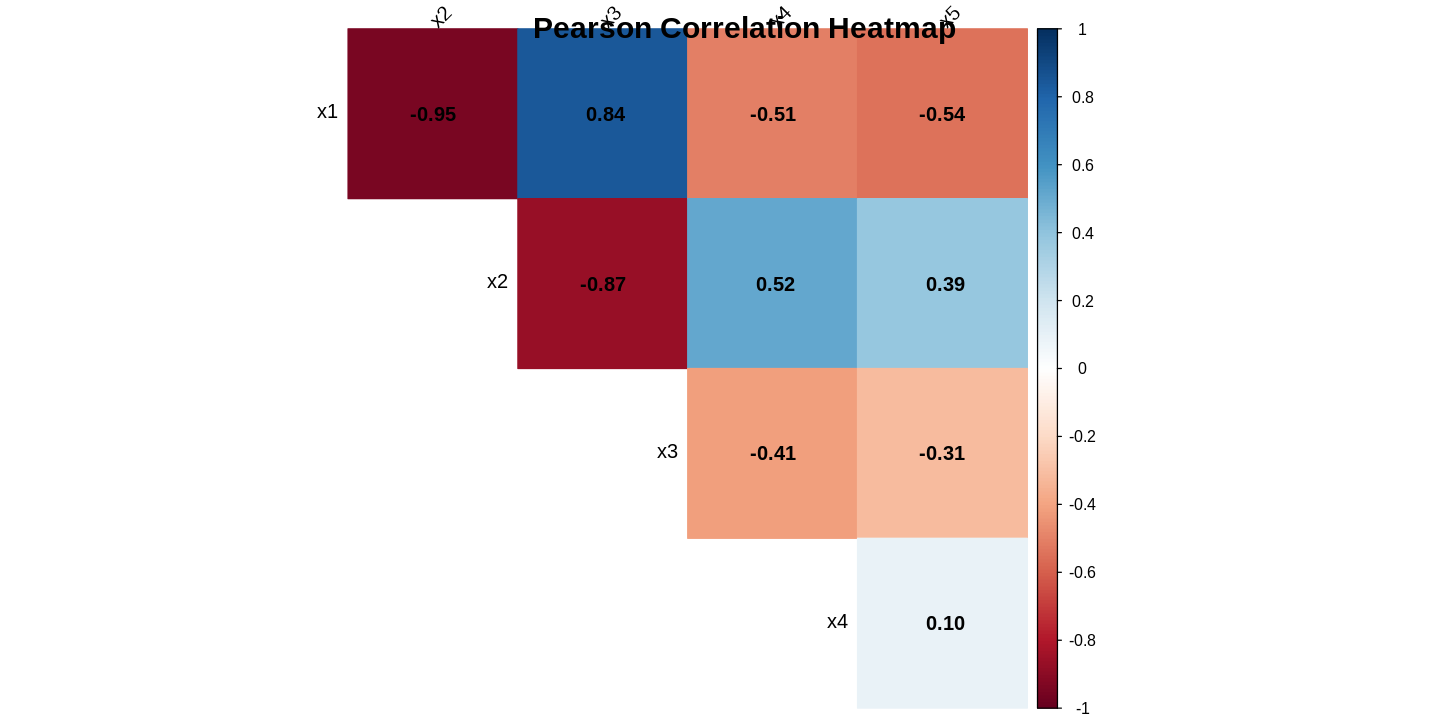

In [30]:

cor_matrix <- cor(df[c('x1', 'x2', 'x3', 'x4', 'x5')])

corrplot(cor_matrix,
         method = "color",
         type = "upper",
         addCoef.col = "black",
         tl.col = "black",
         tl.srt = 45,
         diag = FALSE)

# Add a title
title("Pearson Correlation Heatmap", line = 2.5, cex.main = 1.5)
